In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [10]:
from sklearn.datasets import make_classification

In [23]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [24]:
pd.DataFrame(X)

,0,1
0,-1.344627,-1.207966
1,1.264826,1.008105
2,-1.354810,1.388040
3,-1.387914,-0.286583
4,1.741085,1.897972
...,...,...
995,0.990691,-1.456521
996,0.524902,0.029388
997,1.705842,2.050614
998,-0.501380,0.909317


In [25]:
pd.DataFrame(y)

,0
0,0
1,1
2,0
3,0
4,1
...,...
995,1
996,1
997,1
998,0


<Axes: xlabel='0', ylabel='1'>

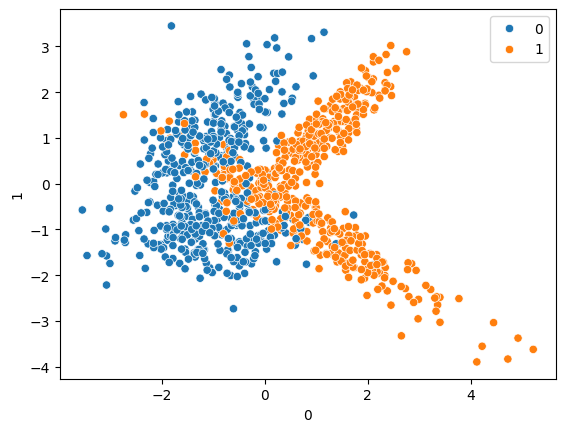

In [26]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
from sklearn.svm import SVC

In [29]:
svc=SVC(kernel='linear')

In [30]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [31]:
y_pred=svc.predict(X_test)


In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       118
           1       0.92      0.83      0.87       132

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.88      0.87      0.87       250

[[108  10]
 [ 22 110]]


In [34]:
rbf=SVC(kernel="rbf")

In [35]:
rbf.fit(X_train,y_train)

SVC()

In [36]:
y_pred1=rbf.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       118
           1       0.96      0.89      0.92       132

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[113   5]
 [ 15 117]]


In [42]:
polynomial=SVC(kernel="poly")
polynomial.fit(X_train,y_train)
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       118
           1       0.90      0.89      0.89       132

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

[[105  13]
 [ 15 117]]


In [43]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [46]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [47]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [48]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [50]:
model=SVC(C=100,gamma=1,kernel='rbf')
model.fit(X_train,y_train)
y_pred5=model.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       118
           1       0.94      0.90      0.92       132

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

